# Bivariate: Num/Num: Statistics

## 1. Correlation in Numpy and Pandas

#### 1a. Compute Correlation Matrix using Numpy

In [2]:
import numpy as np

# Example data: heights in inches
height = [60, 62, 65, 68, 70, 74]

# Example data: weights in pounds
weight = [140, 138, 150, 166, 190, 250]

# Compute the Pearson correlation coefficient between height and weight
r = np.corrcoef(height, weight)
print(f'Pearson Correlation: \n{r}')

# Print the correlation coefficient rounded to two decimal places
print(f'\nCorrelation Coefficient rounded to 2 decimal palces: {round(r[0][1], 2)}')

Pearson Correlation: 
[[1.         0.92989745]
 [0.92989745 1.        ]]

Correlation Coefficient rounded to 2 decimal palces: 0.93


#### In this code:

- r = np.corrcoef(height, weight) computes the correlation coefficient matrix.
- print(f'Pearson Correlation Matrix: \n{r}') prints the entire correlation matrix, which is a 2x2 matrix where r[0][1] (or r[1][0], depending on numpy version) is the correlation coefficient between height and weight.
- print(f'\nCorrelation Coefficient rounded to 2 decimal places: {round(r[0][1], 2)}') prints the correlation coefficient rounded to two decimal places.    

This will output both the full Pearson correlation matrix and the correlation coefficient between height and weight rounded to two decimal places. The correlation matrix provides additional context by showing how each variable correlates with itself (diagonal elements) and with the other variable (off-diagonal elements).

#### 1a. Compute Correlation Matrix using pandas

In [3]:
import pandas as pd

file_path = './data/insurance.csv'
df = pd.read_csv(file_path)

# Compute the correlation matrix for numeric columns
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### 1c. Compute Correlation between Individual Independant and Dependant variables

In [4]:
# Age Vs Charges
print(f'Age vs Charges: {df['charges'].corr(df['age'])}')

Age vs Charges: 0.2990081933306476


In [5]:
# BMI Vs Charges
print(f'BMI vs Charges: {df['charges'].corr(df['bmi'])}')

BMI vs Charges: 0.19834096883362878


In [6]:
# children Vs Charges
print(f'Children vs Charges: {df['charges'].corr(df['children'])}')

Children vs Charges: 0.06799822684790469


## 2. Correlation and p-values using scipy

In [7]:
from scipy import stats

# Compute Pearson correlation coefficient and p-value between 'charges' and 'age'
corr, p_value = stats.pearsonr(df['charges'], df['age'])

# Print correlation and p-value using a formatted string
print(f'Correlation and p-values using scipy: {corr}, {p_value}')

# Alternatively, separate into correlation coefficient and p-value and round to 4 decimal places
r, p = stats.pearsonr(df['charges'], df['age'])
print(f'Correlation: {round(r, 4)}')
print(f'p-value: {round(p, 29)}')


Correlation and p-values using scipy: 0.2990081933306476, 4.886693331718663e-29
Correlation: 0.299
p-value: 5.0000000000000004e-29


#### Interpretation:

- The correlation coefficient of 0.299 suggests that there is a positive linear relationship between 'charges' and 'age'. As age increases, charges tend to increase as well, but the strength of this relationship is relatively weak.
- The very small p-value (approximately 
5
×
1
0
−
29
5×10 
−29
 ) indicates that this observed correlation is statistically significant. Therefore, we can reject the null hypothesis and conclude that there is strong evidence to support the claim that there is a correlation between 'charges' and 'age' in your dataset.
- It's important to note that correlation does not imply causation. While these two variables are correlated, this does not necessarily mean that one variable causes the changes in the other.

In [8]:
# Initialize an empty DataFrame to store correlation coefficients and p-values
corr_df = pd.DataFrame(columns=['r', 'p'])

# Iterate through each column in df
for col in df:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
        # Compute Pearson correlation coefficient and p-value between 'charges' and the current column
        r, p = stats.pearsonr(df['charges'], df[col])
        # Store results in corr_df, rounded to 3 decimal places
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

# Print the resulting DataFrame
print(corr_df)

              r      p
age       0.299  0.000
bmi       0.198  0.000
children  0.068  0.013


#### Explanation:

- corr_df = pd.DataFrame(columns=['r', 'p']): Creates an empty DataFrame corr_df with columns 'r' (correlation coefficient) and 'p' (p-value).
- for col in df:: Iterates through each column (col) in the DataFrame df.
- if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':: Checks if the current column (col) is numeric using pd.api.types.is_numeric_dtype() and ensures it is not the 'charges' column.
- r, p = stats.pearsonr(df['charges'], df[col]): Computes the Pearson correlation coefficient (r) and p-value (p) between 'charges' and the current numeric column (col) in df.
- corr_df.loc[col] = [round(r, 3), round(p, 3)]: Stores the computed correlation coefficient and p-value rounded to 3 decimal places in the corr_df DataFrame, with the column name (col) as the index.
- print(corr_df): Prints the resulting DataFrame corr_df, which contains the correlation coefficients (r) and p-values (p) for each numeric column in relation to 'charges'.

#### Interpretation

The provided DataFrame `corr_df` contains correlation coefficients (r) and their corresponding p-values (p) between the 'charges' column and each numeric column in the original DataFrame `df`. Here’s how to interpret the results:

1. **Column Names (`age`, `bmi`, `children`)**:
   - These are the names of columns from the original DataFrame `df`.

2. **Correlation Coefficients (`r`)**:
   - `r` represents the Pearson correlation coefficient between 'charges' and each respective column (`age`, `bmi`, `children`).
   - The correlation coefficient (`r`) ranges from -1 to 1:
     - A positive value indicates a positive correlation (as one variable increases, the other tends to increase).
     - A negative value indicates a negative correlation (as one variable increases, the other tends to decrease).
     - The magnitude (absolute value) of `r` indicates the strength of the correlation: closer to 1 indicates a stronger correlation, closer to 0 indicates a weaker correlation.
   - Examples:
     - For `age`, `r = 0.299`: There is a moderately positive correlation between 'charges' and 'age'.
     - For `bmi`, `r = 0.198`: There is a weak positive correlation between 'charges' and 'bmi'.
     - For `children`, `r = 0.068`: There is a very weak positive correlation between 'charges' and 'children'.

3. **P-values (`p`)**:
   - `p` indicates the significance of the correlation coefficient.
   - A low p-value (typically < 0.05) suggests that the observed correlation is statistically significant, meaning it is unlikely to have occurred by chance.
   - Examples:
     - For `age`, `p = 0.000`: The correlation between 'charges' and 'age' is statistically significant.
     - For `bmi`, `p = 0.000`: The correlation between 'charges' and 'bmi' is statistically significant.
     - For `children`, `p = 0.013`: The correlation between 'charges' and 'children' is statistically significant, but less so compared to the others.

In summary, based on the `corr_df` DataFrame:
- 'age' and 'bmi' have positive correlations with 'charges', with 'age' showing a stronger correlation.
- 'children' also shows a positive correlation with 'charges', but it is much weaker compared to 'age' and 'bmi'.

All correlations reported have p-values less than 0.05, indicating that they are statistically significant.

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


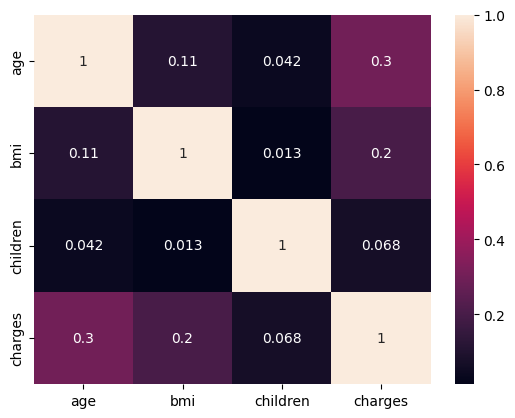

In [21]:
import matplotlib.pylab as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])
print(numeric_df.columns)
print(numeric_df.corr())

ax = sns.heatmap(data=numeric_df.corr(), annot=True)
plt.show()